## Summary Statistics

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("south_african_heart_disease.csv", encoding='ISO-8859-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   row.names  462 non-null    int64  
 1   sbp        462 non-null    int64  
 2   tobacco    462 non-null    float64
 3   ldl        462 non-null    float64
 4   adiposity  462 non-null    float64
 5   famhist    462 non-null    object 
 6   typea      462 non-null    int64  
 7   obesity    462 non-null    float64
 8   alcohol    462 non-null    float64
 9   age        462 non-null    int64  
 10  chd        462 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 39.8+ KB


In [32]:
# Drop irrelevant variables
df.drop('row.names', axis=1, inplace=True)

# Transform famhist to binary values
df['famhist'] = df['famhist'].replace({'Present': 1, 'Absent': 0})

df.describe()

C:\Users\bklec\AppData\Local\Temp\ipykernel_32616\1412502324.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['famhist'] = df['famhist'].replace({'Present': 1, 'Absent': 0})


,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,0.415584,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,0.493357,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,0.000000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,0.000000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,0.000000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,1.000000,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,1.000000,78.000000,46.580000,147.190000,64.000000,1.000000


In [ ]:
# Round to 2 decimal places
df_rounded = df.describe().round(2)

# Apply styling with black text and formatting to 2 decimal places
styled_df = df_rounded.style.format("{:.2f}").set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#f2f2f2'), ('color', 'black')]},  # Set header text to black
    {'selector': 'td', 'props': [('background-color', 'white'), ('color', 'black')]},      # Set cell text to black
    {'selector': 'table', 'props': [('border', '1px solid #ddd'), ('border-collapse', 'collapse')]}
])
styled_df


,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
count,462.00,462.00,462.00,462.00,462.00,462.00,462.00,462.00,462.00,462.00
mean,138.33,3.64,4.74,25.41,0.42,53.10,26.04,17.04,42.82,0.35
std,20.50,4.59,2.07,7.78,0.49,9.82,4.21,24.48,14.61,0.48
min,101.00,0.00,0.98,6.74,0.00,13.00,14.70,0.00,15.00,0.00
25%,124.00,0.05,3.28,19.77,0.00,47.00,22.98,0.51,31.00,0.00
50%,134.00,2.00,4.34,26.12,0.00,53.00,25.80,7.51,45.00,0.00
75%,148.00,5.50,5.79,31.23,1.00,60.00,28.50,23.89,55.00,1.00
max,218.00,31.20,15.33,42.49,1.00,78.00,46.58,147.19,64.00,1.00


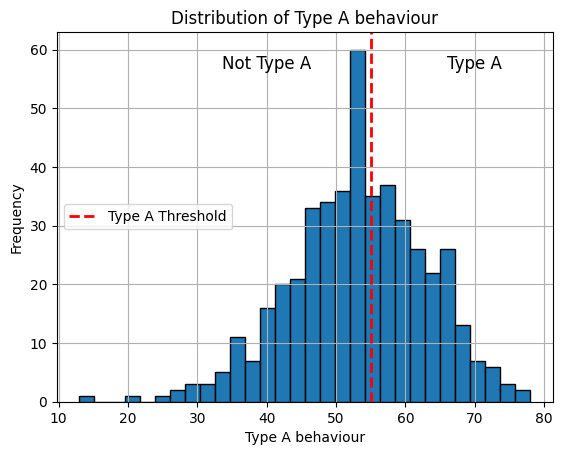

In [36]:
df["typea"].hist(bins=30, edgecolor='black')
plt.axvline(x=55, color='red', linestyle='dashed', linewidth=2, label="Type A Threshold")  # Add vertical line
plt.xlabel("Type A behaviour")
plt.ylabel("Frequency")
plt.title("Distribution of Type A behaviour")
plt.text(40, plt.ylim()[1] * 0.9, "Not Type A", fontsize=12, color="black", ha="center")
plt.text(70, plt.ylim()[1] * 0.9, "Type A", fontsize=12, color="black", ha="center")
plt.legend()
plt.show()

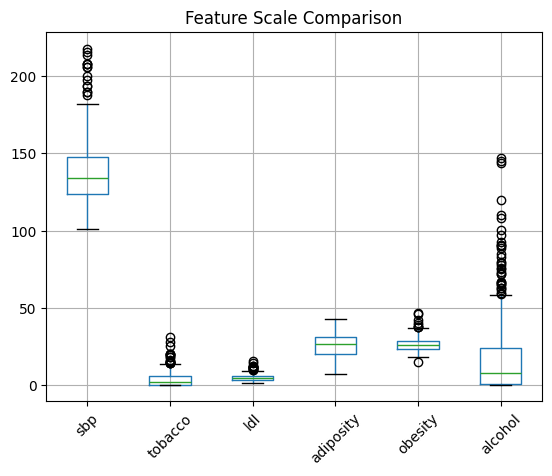

In [35]:
# Feature Scale Comparison
df.boxplot(column=["sbp", "tobacco", "ldl", "adiposity", "obesity", "alcohol"])
plt.xticks(rotation=45)
plt.title("Feature Scale Comparison")
plt.show()

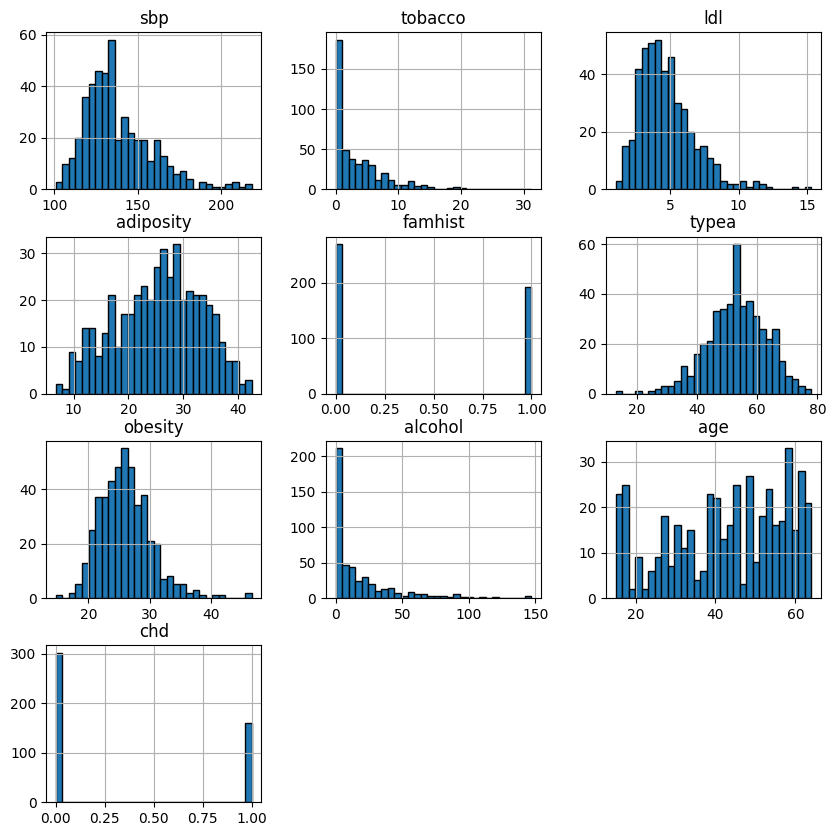

In [41]:
# Plotting histograms for each feature
df.hist(bins=30, figsize=(10, 10), edgecolor='black')
plt.show()